# Numerical Simulation Laboratory

# Numerical exercise 4 

Simulare la dinamica dell'argon nell'insieme microcanonico nei tre stati termodinamici (gassoso, liquido, solido), utilizzando l'algoritmo di Verlet. Dalla simulazione misurare l'andamento di alcune osservabili rilevanti: energia totale, energia cinetica, energia potenziale, temperatura, pressione.

L'algoritmo di Verlet permette di integrare numericamente l'equazione di Newton, non è tra i più onerosi a svolgere questo compito ed ha una buona conservazione dell'energia a lungo raggio, a scapito di qualche fluttuazione short-range in più. In questa simulazione l'interazione è assunta essere il potenziale di Lennard-Jones, che per sistemi come i gas nobili è noto dare risultati consistenti (escludendo particolari zone del diagramma di fase dell'elio, dove effetti quantistici non sono più trascurabili).

*Nota*: non sono state utilizzate correzioni di coda in questo algoritmo, il cut-off taglia del tutto il potenziale: implementare tali correzioni può essere un buon miglioramento dell'algoritmo.

Per tutte le fasi ho utilizzato i seuenti parametri:
 - $N=108$ particelle 
 - $dt^\star=0.0005$ incremento temporale per il calcolo degli step successivi in unità ridotte: sebbene la simualzione lavori in unità ridotte (con la stessa simulazione posso osservare la dinamica di diversi sistemi!), per mostrare i risultati passeremo poi al sistema internazionale
 - $N_{step}=10^4$ numero di step per singolo lancio della simulazione
 - Tutti i sistemi partono da una configurazione cristallina FCC, questo per evitare che in configurazioni casuali particolarmente critiche il sistema abbia quasi-sovrapposizioni di particelle, che rendono la convergenza troppo lenta
 
I Parametri per l'argon nel SI sono:

In [13]:
import math
Kb = 1.380649 * 10**-23    #cost Boltzmann in J/K
e  = 1.602176 * 10**-19    #eV/J
u  = 1.66054  * 10**-27    #Kg/amu
#Kb = Kb*e                  #cost Boltzmann in eV/K

#conversione unità ridotte in unità SI
T=120                     #K
epsilon = T * Kb          #profondità della buca in J
sigma = 0.34 * 10**-9     #lunghezza caratteristica di variazione del potenziale in metri
m = 39.9486 * u           #massa in Kg
P = epsilon/sigma**3      #pressione caratteristica in Pa

t = sigma*math.sqrt(m/epsilon)#unità di tempo in s
dt= t*0.0005
print(dt)

1.0757023312734768e-15


Come si vede qui sopra, ogni frame della simulazione equivarrebbe a circa $1.076 fs$.

Tutte e tre le simulazioni avranno una parte di **equilibrazione**, nella quale lancio la simulazione una prima volta, dopodichè effettuo un certo numero di rilanci della simulazione utilizzando le ultime due configurazioni della precedente come configurazioni iniziali; inoltre genero un frame di prova del sistema in modo da osservare quanto sono distante dalla temperatura target e riscalare le velocità in modo da avvicinarmi meglio ad essa. In questo modo lascio evolvere il sistema al valore di temperatura *target* $T^\star$ che ho imposto (la $T$ nel sistema è calcolata dalle velocità).

L'altra parte sarà invece la **simulazione "vera"** del sistema che dovrebbe trovarsi nell'intorno dello stato imposto, e da questa misuro le quantità che mi interessano

Verrà eseguita una misura ogni 10 step e successivamente si utilizzerà la tecnica del **data blocking** ($N_b=100$) per stimare le incertezze

## Fase solida
<img src="img/solid.gif"  width="300" style="float:right">
Per il sistema nella fase solida utilizzo i seguenti valori di temperatura, densità e cut-off del potenziale riportati qui in unità ridotte di *Lennard-Jones*.

- Temperatura $T^\star=0.8$
- Densità $\rho^\star=1.1$
- Cut-off $r_c^\star = 2.2$

Scrivendo le diverse configurazioni che il sistema esplora posso ricorstruire la sua evoluzione; quest'ultima è mostrata nell'animazione qui a fianco: si noti come la struttura reticolare è mantenuta nel tempo, almeno per gli $11 ps$ della simulazione riequilibrata, il moto non è frenetico a questa scala temporale.

### <font color=red> Rilanci ed equilibrazione</font>
Il grafico sottostante mostra i valori della temperatura istantanea ad ogni rilancio: poichè le misure sono effettuate ogni $10$ step, ho $1000$ valori per simulazione. E' ben visibile che circa già dopo quattro rilanci la temperatura sembra centrata attorno al valore desiderato, per cui posso dire di aver raggiunto l'intorno dell'equilibro. 

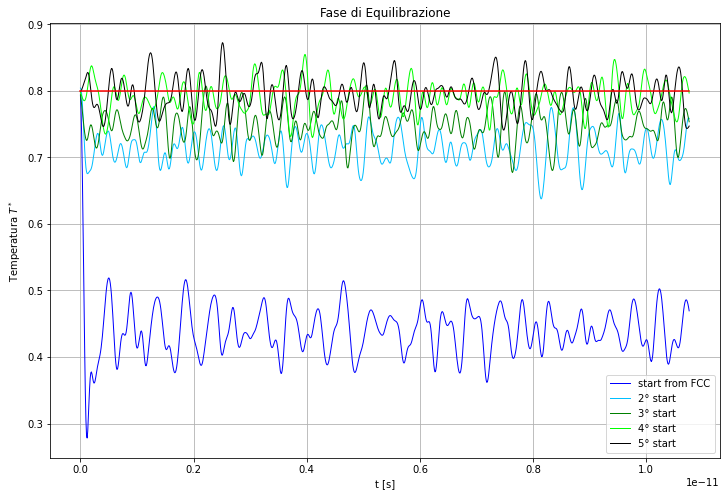

In [15]:
import math
import numpy as np
import matplotlib.pyplot as plt

n=5  #numero di simulazioni per equilibrazione
plt.figure(figsize=(12, 8))
colors = ["blue", "deepskyblue", "green", "lime", "black"]
labels = ["start from FCC"]
size=1
for i in range(n):
    temp= np.loadtxt('data/measures/solid/output_temp'+str(i+1)+'.dat', delimiter =' ', unpack = 'True')
    if i==0: x=np.linspace(0, len(temp), len(temp))*dt*10
    if i!=0: labels.append(str(i+1)+"° start")
    if i==n: size=2
    plt.plot(x, temp, label=labels[i], color=colors[i], linewidth=size)  #primi n riavvii della simulazione
    
Ttarget = 0.8*x**0
plt.plot(x, Ttarget, color='red') #temperatura target
    
plt.xlabel('t [s]')
plt.ylabel('Temperatura $T^*$')    
plt.title('Fase di Equilibrazione')
plt.legend()
plt.grid(True)

### <font color=red> Misure di osservabili </font>

### <font color=blue> Energia </font>
Qui di seguito sono mostrati i risultati per l'andamento delle energie totale, potenziale e cinetica per particella del sistema solido in funzione del tempo. Un andamento convergente è quello che dovrei aspettarmi da questo tipo di simulazione

Energia totale finale:  -0.060624100976846486 eV
Energia cinetica finale:  0.012525402260975073 eV
Energia potenziale finale:  -0.07314960664586163 eV


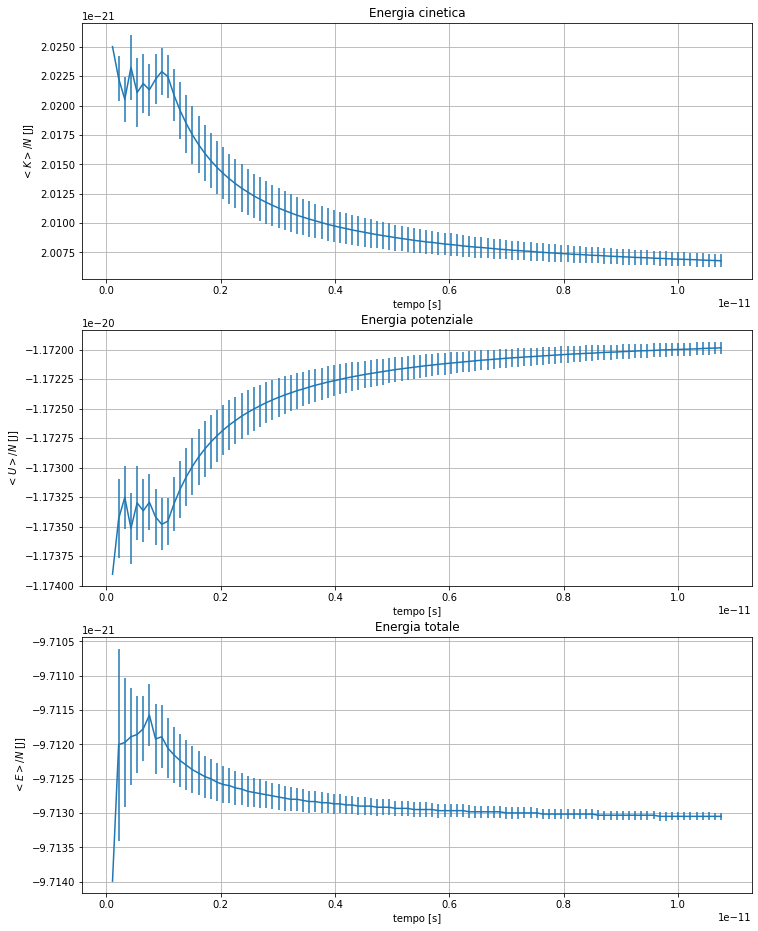

In [25]:
x, ekin, errek= np.loadtxt('data/measures/solid/ave_ekin.out', delimiter = ' ', unpack = 'True')
x, epot, errep= np.loadtxt('data/measures/solid/ave_epot.out', delimiter = ' ', unpack = 'True')
x, etot, erret= np.loadtxt('data/measures/solid/ave_etot.out', delimiter = ' ', unpack = 'True')

#conversione in unità SI
x *= dt
ekin *= epsilon   #energie in eV
epot *= epsilon
etot *= epsilon
errek *= epsilon
errep *= epsilon
erret *= epsilon

print("Energia totale finale: ", etot[len(ekin)-1]/e, "eV" )
print("Energia cinetica finale: ", ekin[len(ekin)-1]/e, "eV" )
print("Energia potenziale finale: ", epot[len(ekin)-1]/e, "eV" )

plt.figure(figsize=(12, 16))
plt.subplot(311)  #energia cinetica
plt.errorbar(x, ekin, yerr=errek)
plt.title("Energia cinetica")
plt.ylabel('$<K>/N$ [J]')
plt.xlabel('tempo [s]')
plt.grid(True)

plt.subplot(312)  #energia potenziale
plt.errorbar(x, epot, yerr=errep)
plt.title("Energia potenziale")
plt.ylabel('$<U>/N$ [J]')
plt.xlabel('tempo [s]')
plt.grid(True)

plt.subplot(313)   #energia totale
plt.errorbar(x, etot, yerr=erret)
plt.title("Energia totale")
plt.ylabel('$<E>/N$ [J]')
plt.xlabel('tempo [s]')
plt.grid(True)

plt.show()

### <font color=blue> Temperatura </font>
In seguito sono mostrati i risultati per l'osservabile temperatura. Il risultato finale sembra in effetti molto prossimo alla temperatura *target* inserita per richiedere un certo stato termodinamico; lo scarto relativo è dello $0.9 \%$, tuttavia è molte deviazioni stardard più distante: sembra quindi che l'algoritmo vada a convergere non esattamente al valore di target.

Temperatura finale:  96.9 K
Temperatura target della simulazione:  96.0 K


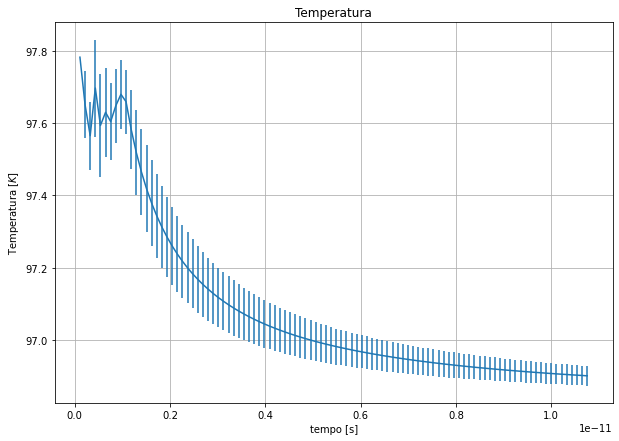

In [28]:
x, temp, errtemp= np.loadtxt('data/measures/solid/ave_temp.out', delimiter = ' ', unpack = 'True')
plt.figure(figsize=(10, 7))

#conversione in unità SI
x *= dt
temp *= T         #temperature in K
errtemp *= T

target = T*0.8*x**0
print("Temperatura finale: ", round(temp[len(temp)-1],2), "K")
print("Temperatura target della simulazione: ", target[0], "K")
plt.errorbar(x, temp, yerr=errtemp, label='temperatura ossersvata')  #temperatura osservata

plt.xlabel('tempo [s]')
plt.ylabel('Temperatura $[K]$')
plt.title('Temperatura')
plt.grid(True)

### <font color=blue> Pressione </font>

Stimiamo infine la pressione tramite il calcolo del viriale: utiizzando l'equipartizione generalizzata posso afermare che
    $$ -\frac{1}{3}\langle \sum_{i} \vec{r_i} \cdot \nabla _i v \rangle = \frac{1}{3}\langle \sum_{i} \vec{r_i} \cdot \vec{f_i ^{tot}} \rangle = Nk_b T\,.$$
    
Scomponendo $\vec{f^{tot}} = \vec{f^{int}}+\vec{f^{ext}}$ e sapendo che il contributo di forze esterne mi da proprio $-PV$ ottengo
    $$ P = \rho k_b T + \frac{\langle W \rangle}{V}   \,.$$
    
dove il viriale $W$ è definito (in unità LJ)
    $$ W = \frac{1}{3} \sum_{i} \vec{r_i} \cdot \vec{f_i ^{tot}} =\sum_{i,j} 48 \left[ \left( \frac{1}{r_{ij}} \right)^{12} - \frac{1}{2} \left( \frac{1}{r_{ij}} \right)^6 \right ] \,.$$

Pressione finale:  3474459552.917767 Pa


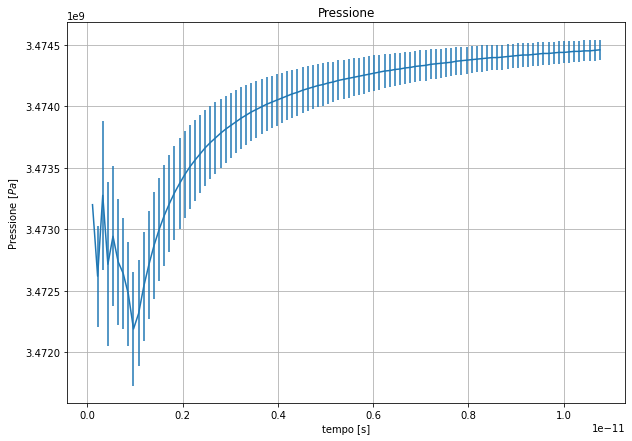

In [30]:
x, pres, errpres= np.loadtxt('data/measures/solid/ave_pres.out', delimiter = ' ', unpack = 'True')
plt.figure(figsize=(10, 7))

#conversione in unità SI
pres *= P #pressioni in Pa
errpres *= P
x *= dt

print("Pressione finale: ", pres[len(pres)-1], "Pa")
plt.errorbar(x, pres, yerr=errpres)  #pressione osservata

plt.xlabel('tempo [s]')
plt.ylabel('Pressione $[Pa]$')
plt.title('Pressione')
plt.grid(True)

## Fase liquida
<img src="img/liquid.gif"  width="300" style="float:right">
Per il sistema nella fase liquida utilizzo i seguenti valori di temperatura, densità e cut-off del potenziale riportati qui in unità ridotte di *Lennard-Jones*.

- Temperatura $T^\star=1.1$
- Densità $\rho^\star=0.8$
- Cut-off $r_c = 2.5$

Ancora una volta, l'animazione mostra l'evoluzione nel tempo delle configurazioni: si noti come il sistema ha un ricordo di una struttura definita, ma l'agitazione termica inizia a dare maggiore libertà alle molecole

### <font color=red> Rilanci ed equilibrazione</font>
Il grafico sottostante mostra i valori della temperatura istantanea ad ogni rilancio: poichè le misure sono effettuate ogni $10$ step, ho $1000$ valori per simulazione. E' ben visibile che circa già dopo quattro rilanci la temperatura sembra centrata attorno al valore desiderato, per cui posso dire di aver raggiunto l'intorno dell'equilibro. 

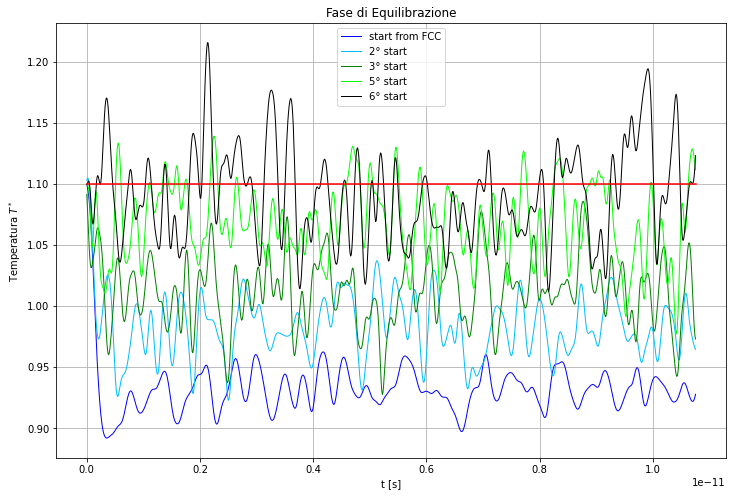

In [8]:
import math
import numpy as np
import matplotlib.pyplot as plt
import os

n=6  #numero di simulazioni per equilibrazione
plt.figure(figsize=(12, 8))

colors = ["blue", "deepskyblue", "green", "lime", "black"]

counter=0
size=1
for i in range(n):
    if os.path.isfile('data/measures/liquid/output_temp'+str(i+1)+'.dat')==True:
        temp= np.loadtxt('data/measures/liquid/output_temp'+str(i+1)+'.dat', delimiter =' ', unpack = 'True')
        
        if i==0: x=np.linspace(0, len(temp), len(temp))*dt*10
        if i==n: size=2
            
        if i==0: labels.append("start from FCC")
        else: labels.append(str(i+2)+"° start")
            
        plt.plot(x, temp, label=labels[counter], color=colors[counter], linewidth=size)#riavvii della simulazione
        counter+=1

Ttarget = 1.1*x**0
plt.plot(x, Ttarget, color='red') #temperatura target
    
plt.xlabel('t [s]')
plt.ylabel('Temperatura $T^*$')    
plt.title('Fase di Equilibrazione')
plt.legend()
plt.grid(True)

### <font color=red> Misure di osservabili </font>

### <font color=blue> Energia </font>
Qui di seguito sono mostrati i risultati per l'andamento delle energie totale, potenziale e cinetica per particella del sistema liquido in funzione del tempo. Un andamento convergente è quello che dovrei aspettarmi da questo tipo di simulazione

Energia totale finale:  -0.03946722961160322 eV
Energia cinetica finale:  0.015987400034328313 eV
Energia potenziale finale:  -0.055454629645931536 eV


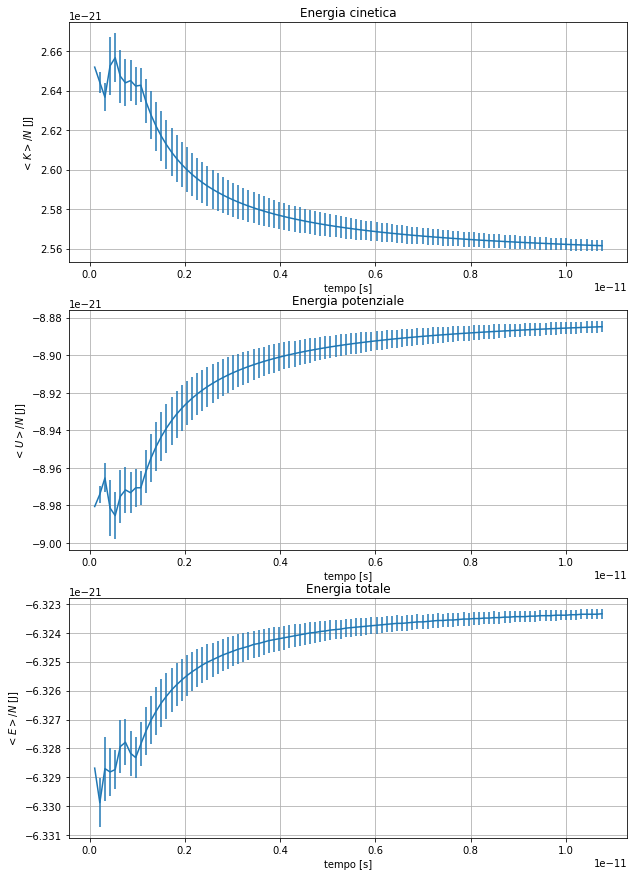

In [17]:
x, ekin, errekin= np.loadtxt('data/measures/liquid/ave_ekin.out', delimiter = ' ', unpack = 'True')
x, epot, errepot= np.loadtxt('data/measures/liquid/ave_epot.out', delimiter = ' ', unpack = 'True')
x, etot, erretot= np.loadtxt('data/measures/liquid/ave_etot.out', delimiter = ' ', unpack = 'True')

#conversione in unità SI
x *= dt
ekin *= epsilon   #energie in J
epot *= epsilon
etot *= epsilon
errekin *= epsilon
errepot *= epsilon
erretot *= epsilon

print("Energia totale finale: ", etot[len(ekin)-1]/e, "eV" )
print("Energia cinetica finale: ", ekin[len(ekin)-1]/e, "eV" )
print("Energia potenziale finale: ", epot[len(ekin)-1]/e, "eV" )

plt.figure(figsize=(10, 15))
plt.subplot(311)  #energia cinetica
plt.errorbar(x, ekin, yerr=errekin)
plt.title("Energia cinetica")
plt.ylabel('$<K>/N$ [J]')
plt.xlabel('tempo [s]')
plt.grid(True)

plt.subplot(312)  #energia potenziale
plt.errorbar(x, epot, yerr=errepot)
plt.title("Energia potenziale")
plt.ylabel('$<U>/N$ [J]')
plt.xlabel('tempo [s]')

plt.grid(True)

plt.subplot(313)   #energia totale
plt.errorbar(x, etot, yerr=erretot)
plt.title("Energia totale")
plt.ylabel('$<E>/N$ [J]')
plt.xlabel('tempo [s]')
plt.grid(True)

plt.show()

### <font color=blue> Temperatura </font>
In seguito sono mostrati i risultati per l'osservabile temperatura. Il risultato finale sembra in effetti abbastanza vicino alla temperatura *target* inserita per richiedere un certo stato termodinamico; lo scarto relativo è del $6.7 \%$, tuttavia è molte deviazioni stardard più distante: sembra quindi che l'algoritmo vada a convergere non esattamente al valore di target.

Temperatura finale:  123.68 K
Temperatura target della simulazione:  132.0 K


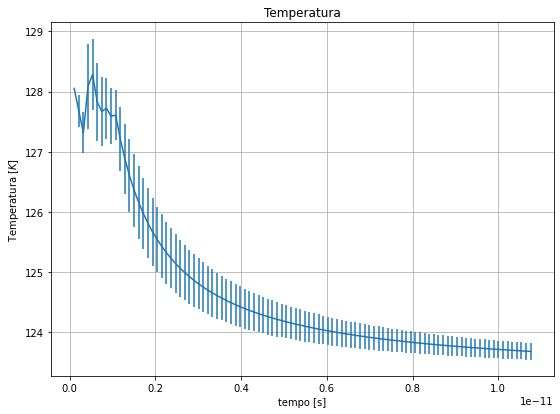

In [18]:
x, temp, errtemp= np.loadtxt('data/measures/liquid/ave_temp.out', delimiter = ' ', unpack = 'True')
plt.figure(figsize=(9, 6.5))

#conversione in unità SI
x *= dt
temp *= T         #temperature in K
errtemp *= T

target=T*1.1*x**0
print("Temperatura finale: ", round(temp[len(temp)-1],2), "K")
print("Temperatura target della simulazione: ", target[0], "K")
plt.errorbar(x, temp, yerr=errtemp, label='temperatura ossersvata')  #temperatura osservata
#plt.plot(x, target, color='red', label='temperatura desiderata')  #temperatura desiderata

plt.xlabel('tempo [s]')
plt.ylabel('Temperatura $[K]$')
plt.title('Temperatura')
plt.grid(True)

### <font color=blue> Pressione </font>
Utilizzando sempre il viriale, calcolo le pressioni per la fase liquida:

Pressione finale:  1467406757.4852424 Pa


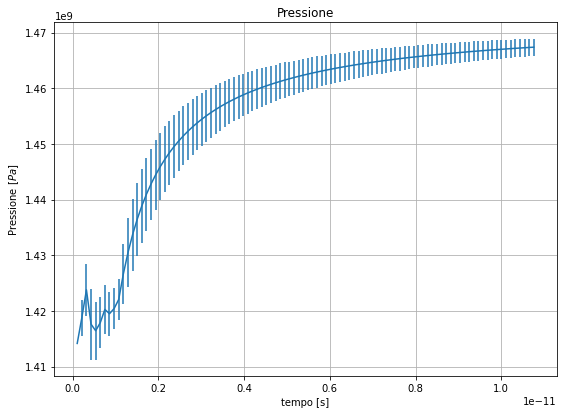

In [19]:
x, pres, errpres= np.loadtxt('data/measures/liquid/ave_pres.out', delimiter = ' ', unpack = 'True')
plt.figure(figsize=(9, 6.5))

#conversione in unità SI
x *= dt    #intervallo corrispondente ad ogni blocco di 5000 step in ns
pres *= P         #pressioni in Pa
errpres *= P
print("Pressione finale: ", pres[len(pres)-1], "Pa")

plt.errorbar(x, pres, yerr=errpres, label='pressione')  #pressione osservata
plt.xlabel('tempo [s]')
plt.ylabel('Pressione $[Pa]$')
plt.title('Pressione')
plt.grid(True)

## Fase gassosa
<img src="img/gas.gif"  width="300" style="float:right">
Per il sistema nella fase gassosa utilizzo i seguenti valori di temperatura, densità e cut-off del potenziale riportati qui in unità ridotte di *Lennard-Jones*.

- Temperatura $T^\star=1.2$
- Densità $\rho^\star=0.05$
- Cut-off $r_c = 5.0$

L'animazione a fianco mostra come il sistema in fase gassosa abbia ormai perso una struttura definita e si sia allontanato molto dalla FCC di partenza: il contributo termico sta vincendo sull'interazione. Inoltre nello stsso volumetto troviamo molte meno molecole rispetto agli altri due casi, avendo abbassato di molto la densità

### <font color=red> Rilanci ed equilibrazione </font>
Effettuo l'equilibrazione del sistema gassoso a partire dalle configurazioni finali ottenute dalla precedente simulazione della fase liquida e rilancio il programma finchè non osservo che la temperatura istantanea del sistema oscilla intorno al valore target. Poichè la fase gassosa è più difficile da portare all'equilibrio (è più distante dalla configurazione FCC iniziale), in ogni rilancio effettuo $20000$ step in modo da aumentare le interazioni tra molecole e gli scambi di energia così da velocizzare il processo di stabilizzazione.

Il grafico sottostante mostra i valori della temperatura istantanea ad ogni rilancio: poichè le misure sono effettuate ogni $10$ step, ogni rilancio presenta $2000$ valori. Come si può osservare, alla fine del processo la temperatura oscilla intorno al valore desiderato ma tali oscillazioni sono più ampie rispetto ai casi precedenti indicando che il sistema gassoso è più difficile da portare all'equilibrio.

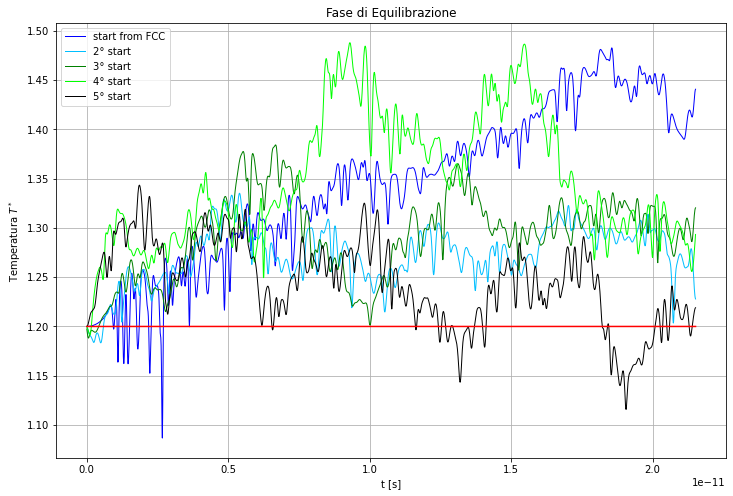

In [21]:
import math
import numpy as np
import matplotlib.pyplot as plt
import os

n=8  #numero di simulazioni per equilibrazione
plt.figure(figsize=(12, 8))

colors = ["blue", "deepskyblue", "green", "lime", "black"]

counter=0
size=1
for i in range(n):
    if os.path.isfile('data/measures/gas/output_temp'+str(i+1)+'.dat')==True:
        temp= np.loadtxt('data/measures/gas/output_temp'+str(i+1)+'.dat', delimiter =' ', unpack = 'True')
        
        if i==0: x=np.linspace(0, len(temp), len(temp))*dt*10
        if i==n: size=2
            
        if i==0: labels.append("start from FCC")
        else: labels.append(str(i+2)+"° start")
            
        plt.plot(x, temp, label=labels[counter], color=colors[counter], linewidth=size)#riavvii della simulazione
        counter+=1

Ttarget = 1.2*x**0
plt.plot(x, Ttarget, color='red') #temperatura target
    
plt.xlabel('t [s]')
plt.ylabel('Temperatura $T^*$')    
plt.title('Fase di Equilibrazione')
plt.legend()
plt.grid(True)

### <font color=red> Misure ed osservabili </font>
### <font color=blue> Energia </font>
Qui di seguito sono mostrati i risultati per l'andamento delle energie totale, potenziale e cinetica per particella del sistema liquido in funzione del tempo. Un andamento convergente è quello che dovrei aspettarmi da questo tipo di simulazione, tuttavia qui si osserva una certa fluttuazione anche nei vaori finali, a indicare la maggiore difficoltà di questo sistema ad assestarsi nello stato termodinamico richiesto, a psrtire dalla configurazione iniziale scelta.

Potrei avere risultati migliori lasciando più tempo alla simulazione di evolvere e eventualmente aggiungendo le correzioni di coda.

Energia totale finale:  0.009294573161188284 eV
Energia cinetica finale:  0.018799581683909883 eV
Energia potenziale finale:  -0.009504998181917593 eV


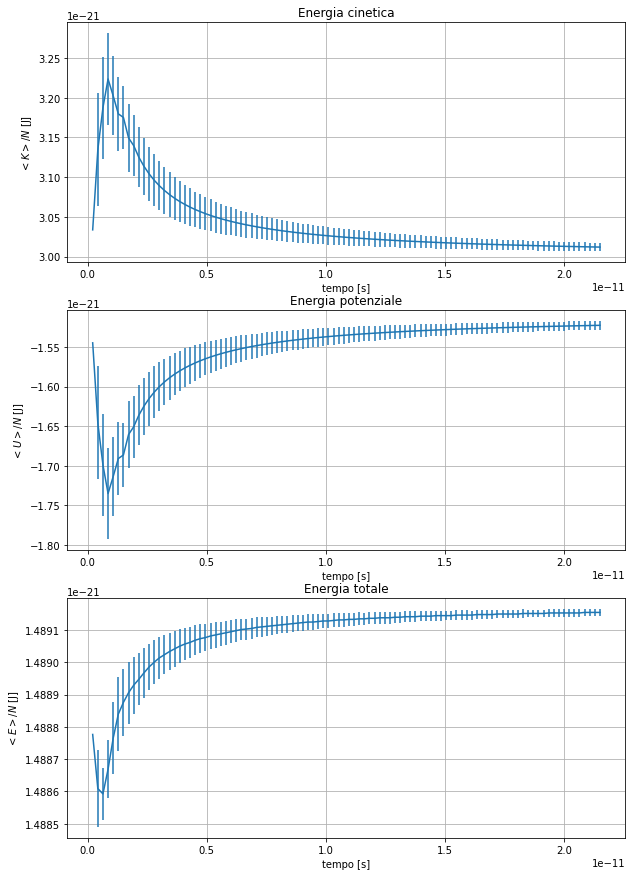

In [22]:
x, ekin, errekin= np.loadtxt('data/measures/gas/ave_ekin.out', delimiter = ' ', unpack = 'True')
x, epot, errepot= np.loadtxt('data/measures/gas/ave_epot.out', delimiter = ' ', unpack = 'True')
x, etot, erretot= np.loadtxt('data/measures/gas/ave_etot.out', delimiter = ' ', unpack = 'True')

#conversione in unità SI
x *= dt
ekin *= epsilon   #energie in eV
epot *= epsilon
etot *= epsilon
errekin *= epsilon
errepot *= epsilon
erretot *= epsilon

print("Energia totale finale: ", etot[len(ekin)-1]/e, "eV" )
print("Energia cinetica finale: ", ekin[len(ekin)-1]/e, "eV" )
print("Energia potenziale finale: ", epot[len(ekin)-1]/e, "eV" )

plt.figure(figsize=(10, 15))
plt.subplot(311)  #energia cinetica
plt.errorbar(x, ekin, yerr=errekin)
plt.title("Energia cinetica")
plt.ylabel('$<K>/N$ [J]')
plt.xlabel('tempo [s]')
plt.grid(True)

plt.subplot(312)  #energia potenziale
plt.errorbar(x, epot, yerr=errepot)
plt.title("Energia potenziale")
plt.ylabel('$<U>/N$ [J]')
plt.xlabel('tempo [s]')

plt.grid(True)

plt.subplot(313)   #energia totale
plt.errorbar(x, etot, yerr=erretot)
plt.title("Energia totale")
plt.ylabel('$<E>/N$ [J]')
plt.xlabel('tempo [s]')
plt.grid(True)

plt.show()

### <font color=blue> Temperatura </font>
In seguito sono mostrati i risultati per l'osservabile temperatura. Il risultato finale sembra in effetti abbastanza vicino alla temperatura *target* inserita per richiedere un certo stato termodinamico; lo scarto relativo è del $1 \%$, tuttavia è comunque diverse deviazioni stardard più distante: sembra quindi che ancora una volta l'algoritmo vada a convergere non esattamente al valore di target.

Temperatura finale:  145.44 K
Temperatura target della simulazione:  144.0 K


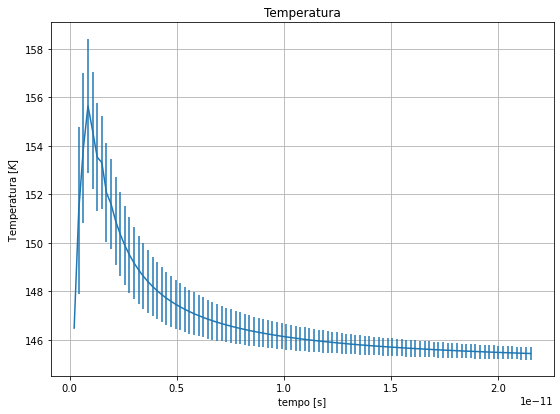

In [24]:
x, temp, errtemp= np.loadtxt('data/measures/gas/ave_temp.out', delimiter = ' ', unpack = 'True')
plt.figure(figsize=(9, 6.5))

#conversione in unità SI
x *= dt
temp *= T         #temperature in K
errtemp *= T

target=T*1.2*x**0
print("Temperatura finale: ", round(temp[len(temp)-1],2), "K")
print("Temperatura target della simulazione: ", target[0], "K")
plt.errorbar(x, temp, yerr=errtemp, label='temperatura ossersvata')  #temperatura osservata
#plt.plot(x, target, color='red', label='temperatura desiderata')  #temperatura desiderata

plt.xlabel('tempo [s]')
plt.ylabel('Temperatura $[K]$')
plt.title('Temperatura')
plt.grid(True)

### <font color=blue> Pressione </font>

Pressione finale:  14107279.264634633 Pa


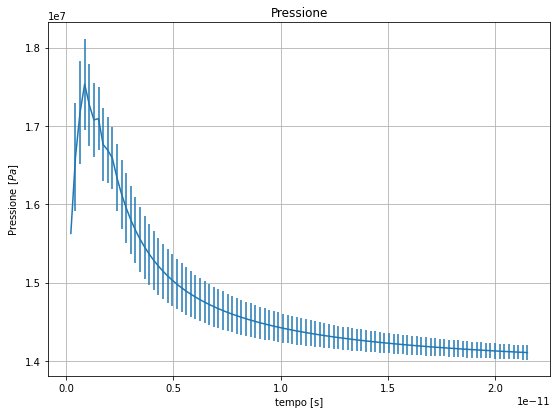

In [25]:
x, pres, errpres= np.loadtxt('data/measures/gas/ave_pres.out', delimiter = ' ', unpack = 'True')
plt.figure(figsize=(9, 6.5))

#conversione in unità SI
x *= dt
pres *= P         #pressioni in Pa
errpres *= P

print("Pressione finale: ", pres[len(pres)-1], "Pa")

plt.errorbar(x, pres, yerr=errpres, label='pressione')  #pressione osservata
plt.xlabel('tempo [s]')
plt.ylabel('Pressione $[Pa]$')
plt.title('Pressione')
plt.grid(True)